<a href="https://colab.research.google.com/github/BillyMuthiani/Machine_Learning-_and-_deep_learning/blob/main/Spotify_Dataset_Churn_Logistic_Regression_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [50]:
df=pd.read_csv('/content/spotify_churn_dataset.csv')
df.head(31)

,user_id,gender,age,country,subscription_type,listening_time,songs_played_per_day,skip_rate,device_type,ads_listened_per_week,offline_listening,is_churned
0,1,Female,54,CA,Free,26,23,0.20,Desktop,31,0,1
1,2,Other,33,DE,Family,141,62,0.34,Web,0,1,0
2,3,Male,38,AU,Premium,199,38,0.04,Mobile,0,1,1
3,4,Female,22,CA,Student,36,2,0.31,Mobile,0,1,0
4,5,Other,29,US,Family,250,57,0.36,Mobile,0,1,1
5,6,Female,17,AU,Free,219,35,0.46,Desktop,13,0,0
6,7,Female,39,UK,Premium,289,44,0.38,Desktop,0,1,0
7,8,Female,41,UK,Free,210,68,0.11,Mobile,5,0,0
8,9,Other,55,DE,Student,50,66,0.29,Web,0,1,0
9,10,Male,44,DE,Free,278,94,0.38,Mobile,44,0,0


In [51]:
#check for missing values
df.isnull().sum()

,0
user_id,0
gender,0
age,0
country,0
subscription_type,0
listening_time,0
songs_played_per_day,0
skip_rate,0
device_type,0
ads_listened_per_week,0


In [52]:
#check for duplicate entries
df.duplicated().sum()

np.int64(0)

In [53]:
#fill null values
df.fillna(0, inplace=True)

In [54]:
#general information of the dataset
df.describe(include='all')

,user_id,gender,age,country,subscription_type,listening_time,songs_played_per_day,skip_rate,device_type,ads_listened_per_week,offline_listening,is_churned
count,8000.00000,8000,8000.000000,8000,8000,8000.000000,8000.000000,8000.000000,8000,8000.000000,8000.000000,8000.000000
unique,NaN,3,NaN,8,4,NaN,NaN,NaN,3,NaN,NaN,NaN
top,NaN,Male,NaN,AU,Premium,NaN,NaN,NaN,Desktop,NaN,NaN,NaN
freq,NaN,2691,NaN,1034,2115,NaN,NaN,NaN,2778,NaN,NaN,NaN
mean,4000.50000,NaN,37.662125,NaN,NaN,154.068250,50.127250,0.300127,NaN,6.943875,0.747750,0.258875
std,2309.54541,NaN,12.740359,NaN,NaN,84.015596,28.449762,0.173594,NaN,13.617953,0.434331,0.438044
min,1.00000,NaN,16.000000,NaN,NaN,10.000000,1.000000,0.000000,NaN,0.000000,0.000000,0.000000
25%,2000.75000,NaN,26.000000,NaN,NaN,81.000000,25.000000,0.150000,NaN,0.000000,0.000000,0.000000
50%,4000.50000,NaN,38.000000,NaN,NaN,154.000000,50.000000,0.300000,NaN,0.000000,1.000000,0.000000
75%,6000.25000,NaN,49.000000,NaN,NaN,227.000000,75.000000,0.450000,NaN,5.000000,1.000000,1.000000


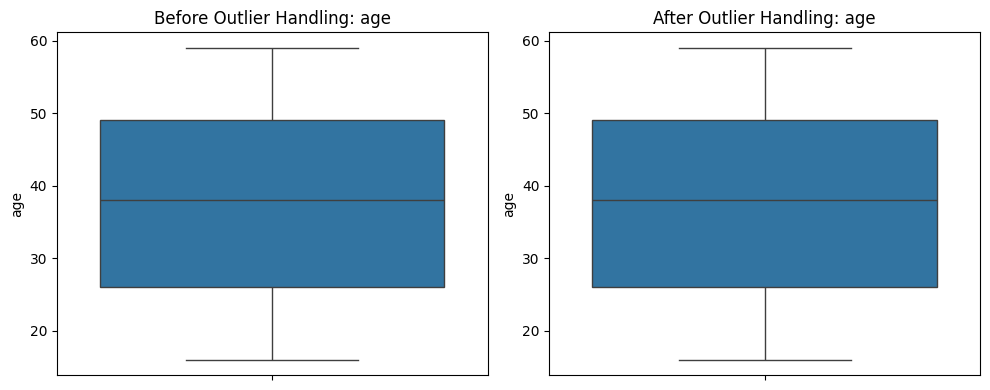

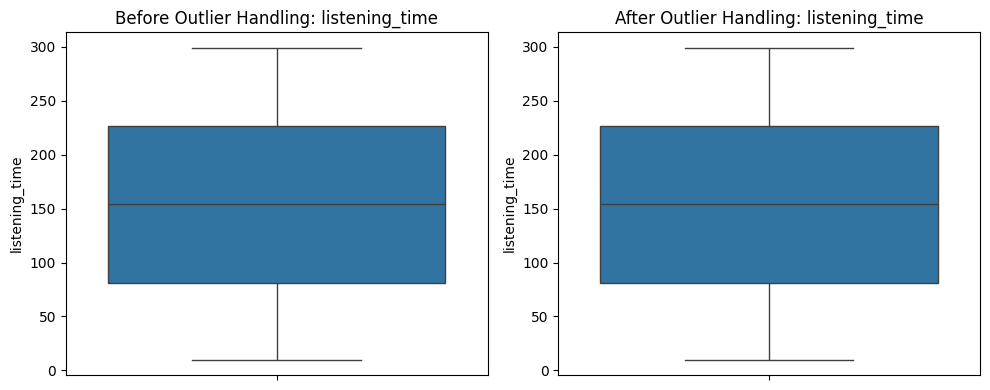

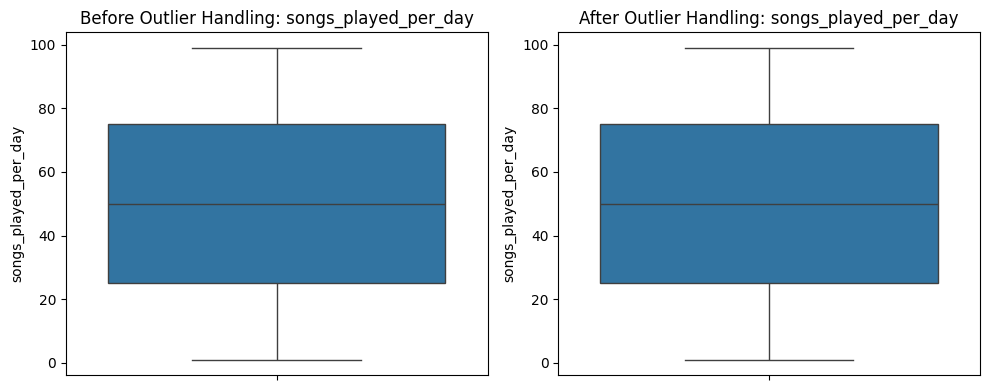

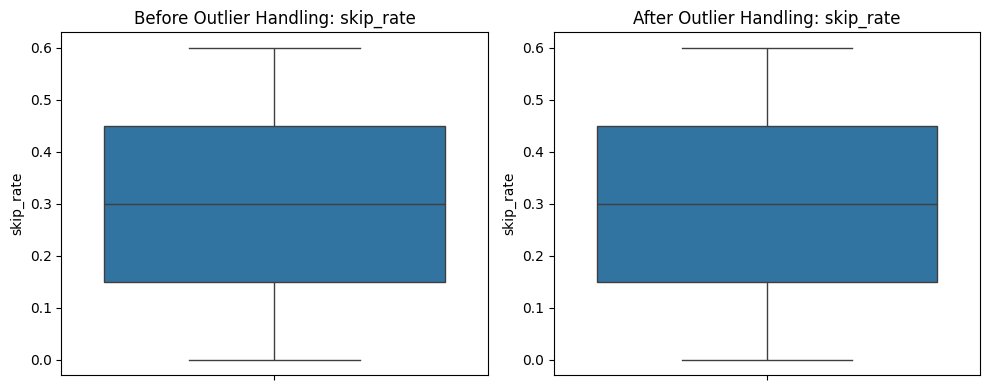

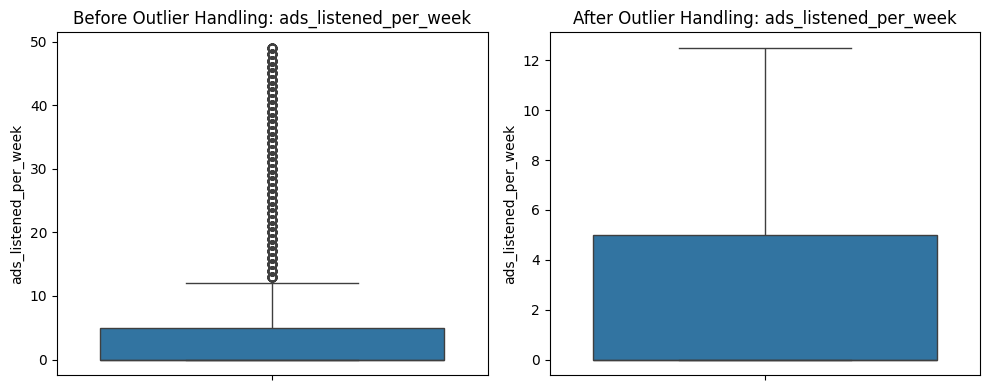

In [55]:
#handle outliers for numerical columns
for col in df.select_dtypes(include=np.number):
    if col in ['user_id', 'offline_listening', 'is_churned']:
        continue  # Skip these columns

    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Visualize distribution before outlier handling
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    sns.boxplot(y=df[col])
    plt.title(f'Before Outlier Handling: {col}')

    # Cap the outliers
    df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
    df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])

    # Visualize distribution after outlier handling
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df[col])
    plt.title(f'After Outlier Handling: {col}')
    plt.tight_layout()
    plt.show()

In [56]:
# Separate target variable
y = df['is_churned']
X = df.drop('is_churned', axis=1)

# Identify categorical columns in features
categorical_cols = X.select_dtypes(include=['object', 'category']).columns

# Apply one-hot encoding to features
X_encoded = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

# Display the first few rows of the encoded features
display(X_encoded.head())

# Display the first few values of the target variable
display(y.head())

,user_id,age,listening_time,songs_played_per_day,skip_rate,ads_listened_per_week,offline_listening,gender_Male,gender_Other,country_CA,...,country_FR,country_IN,country_PK,country_UK,country_US,subscription_type_Free,subscription_type_Premium,subscription_type_Student,device_type_Mobile,device_type_Web
0,1,54.0,26.0,23.0,0.20,12.5,0,False,False,True,...,False,False,False,False,False,True,False,False,False,False
1,2,33.0,141.0,62.0,0.34,0.0,1,False,True,False,...,False,False,False,False,False,False,False,False,False,True
2,3,38.0,199.0,38.0,0.04,0.0,1,True,False,False,...,False,False,False,False,False,False,True,False,True,False
3,4,22.0,36.0,2.0,0.31,0.0,1,False,False,True,...,False,False,False,False,False,False,False,True,True,False
4,5,29.0,250.0,57.0,0.36,0.0,1,False,True,False,...,False,False,False,False,True,False,False,False,True,False


,is_churned
0,1
1,0
2,1
3,0
4,1


In [57]:
#split data into training and testing sets
from sklearn.model_selection import train_test_split

# Check unique values and their counts in the target variable before splitting
print("Unique values and counts in y before split:")
print(y.value_counts())

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42, stratify=y)

Unique values and counts in y before split:
is_churned
0    5929
1    2071
Name: count, dtype: int64


In [66]:
#train a logistic regression model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

model = LogisticRegression()
model.fit(X_train, y_train)

# make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

print('\nClassification Report:')
print(classification_report(y_test, y_pred))

print('\nConfusion Matrix:')
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.74

Classification Report:
              precision    recall  f1-score   support

           0       0.74      1.00      0.85      1186
           1       0.00      0.00      0.00       414

    accuracy                           0.74      1600
   macro avg       0.37      0.50      0.43      1600
weighted avg       0.55      0.74      0.63      1600


Confusion Matrix:
[[1186    0]
 [ 414    0]]
